**Проект:** Статистический анализ данных сервиса аренды самокатов GoFast  

**Описание проекта:**  
для популярного сервиса аренды самокатов GoFast в отдел по Аналитике поступила задача провести исследование на основе информации о пользователях, их поездках и подписках. Данные предоставлены в виде трех csv-файлов.  

**Цель исследования** : на основе данных о пользователях из нескольких городов, а также об их поездках необходимо:  
- проанализировать полученные данные  
- проверить несколько гипотезы  
Данные результатов анализа и проверок гипотез помогут найти верные решения, которые смогут повысить выручку и будут способствовать росту бизнеса.

**1. Загрузка данных**

Импортируем необходимые для работы библиотеки

In [ ]:
import pandas as pd
#импортируем необходимые для проведения стат. анализа библиотеки
pd.options.display.float_format = '{:,.1f}'.format

#импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

#импортируем библиотеку для построения более сложных графиков
import seaborn as sns

#импортируем библиотеку для работы с многомерными массивами
import numpy as np

#импортируем библиотеку проведения статистического анализа (проведения стат. тестов и получения оценок рез-тов)
from scipy import stats as st


#### Шаг 1. Загрузка данных

In [ ]:
#считываю файлы с данными и записываю датасеты в соответствующие переменные
try:
    users = pd.read_csv('users_go.csv', engine = 'python')
except:
#данные по пользователям
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
try:
    rides = pd.read_csv('rides_go.csv', engine = 'python')
except:
# данные по поездкам
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])
try:
    subscriptions = pd.read_csv('subscriptions_go.csv', engine = 'python')
except:
# данные по подпискам
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [ ]:
#изучим общую информацию о Пользователях
users.info()
display (users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Нулевых значений нет (т.е в данных нет пропусков), типы данных корректные.

In [ ]:
#изучим общую информацию о Поездках
rides.info()
display (rides.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,"4,409.9",25.6,2021-01-01
1,1,"2,617.6",15.8,2021-01-18
2,1,754.2,6.2,2021-04-20
3,1,"2,694.8",18.5,2021-08-11
4,1,"4,028.7",26.3,2021-08-28


Нулевых значений нет (т.е в данных нет пропусков), тип данных у типы данных у столбца date не корректный.

In [ ]:
#изучим общую информацию о Подписках
subscriptions.info()
display (subscriptions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Выводы:**  

Данные пользователей, информация о поездках и подписках загружена в три датасета. В ходе первого этапа мы ознакомились с общей информацией, проверили данные на предмет пропусков и корректности типов данных. При загрузки тип данных data был автоматически переведен в тип дата python. В третьем датасете представлена общая информация о параметрах Подписок - free и ultra  

В данных пропусков нет, типы данных корректные.  

#### Шаг 2. Предобработка данных

Более подробно изучим характеристики пользователей.

Скорректируем тип данных там, где это необходимо для дальнейшей работы.  
Добавим дополнительные столбцы, полученные на основе текущих данных.  

In [ ]:
#тип данных был изменен выше при загрузке датасета с данными о поездках
#2.1. изменим тип данных в столбце date на более корректный - даты pandas
#rides['date'] = pd.to_datetime(rides['date'], format ='%Y-%m-%d')

In [ ]:
#2.2. добавим в датасет столбец месяца
rides['month'] = rides['date'].dt.month
#выведем отсортированный список по месяцам
display (rides['month'].value_counts().sort_index())

1     1585
2     1336
3     1544
4     1506
5     1560
6     1553
7     1529
8     1518
9     1517
10    1475
11    1418
12    1527
Name: month, dtype: int64

In [ ]:
#узнаем, за какие года в датасете представлены данные
display (rides['date'].dt.year.unique())

array([2021])

Только за 2021 год

In [ ]:
#2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах: users, rides и subscriptions
users.duplicated().sum()

31

In [ ]:
#удалим, найденные дубликаты в датасете users
users.drop_duplicates(inplace=True)
#проверим, остались ли дубликаты
users.duplicated().sum()

0

In [ ]:
rides.duplicated().sum()

0

In [ ]:
subscriptions.duplicated().sum()

0

В ходе преварительной обработки выяснилось, что пропусков в данных трех датасетов нет. Почти все типы данных указаны корректро, только в столбце data был скорректирован тип данных для того, чтобы было удобнее работать с датами в дальнейшем.  
Были найдены и удалены явные дубликаты в датафрейме users.  
Добавлен новый столбец month.иУточнили, что данные представлены за 2021год.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

In [ ]:
# 3.1 изучим данные распределения пользователей по городам
display (users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

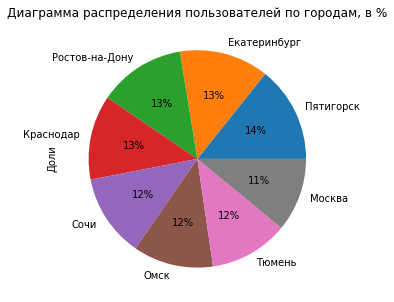

In [ ]:
#строим круговую диаграмму распределения пользователей по городам
users['city'].value_counts().plot(kind = 'pie', y = users['city'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения пользователей по городам, в %');


На круговой диаграмме распределение пользователей по городам выглядит более наглядно. Пользователи распределены почти равномерно, разница между долями небольшая - 1-3%.

Больше всего пользователей из Пятигорска, меньше всего из Москвы.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

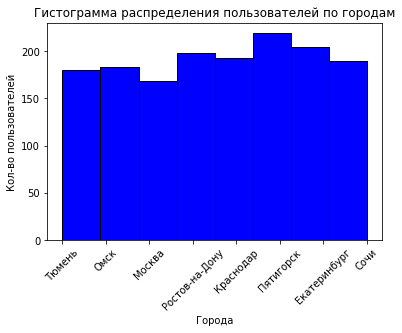

In [ ]:
plt.hist(users['city'], color = 'blue', edgecolor = 'black', bins = 8)
plt.title('Гистограмма распределения пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation=45)

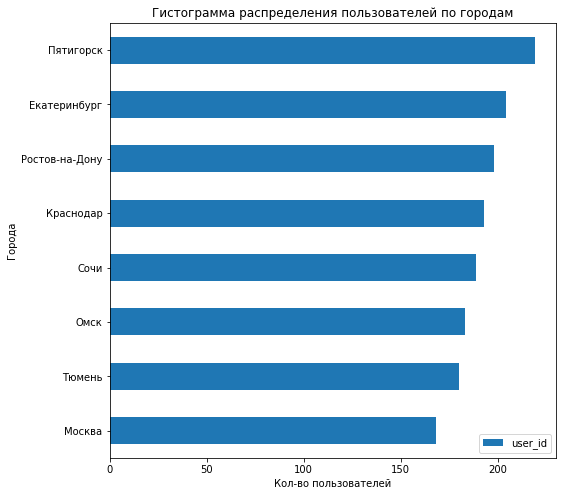

In [ ]:
users_month_pivot_table = pd.pivot_table(users,
                                         index='city',
                                         values=['user_id'],
                                         aggfunc='count').sort_values(by='user_id', ascending=True)
users_month_pivot_table.plot(kind='barh', grid=True, figsize=(8, 8))
plt.title('Гистограмма распределения пользователей по городам')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Города')
plt.grid()
plt.show()

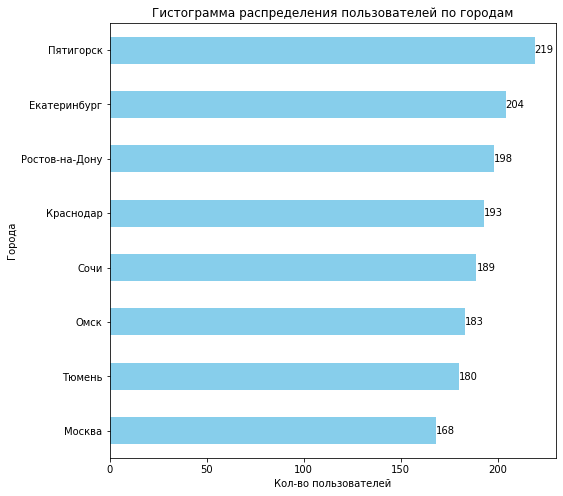

In [ ]:
# Группируем по городам и считаем количество пользователей
users_by_city = users['city'].value_counts().sort_values(ascending=True)

# Построение горизонтальной гистограммы
ax = users_by_city.plot(kind='barh', grid=True, figsize=(8, 8), color='skyblue')

# Добавление значений столбцов в подписи
for i, value in enumerate(users_by_city):
    ax.text(value, i, f'{value}', va='center', ha='left', fontsize=10)

# Настройка графика
plt.title('Гистограмма распределения пользователей по городам')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Города')
plt.grid()
plt.show()

In [ ]:
#3.2 изучим соотношение пользователей с подпиской и без подписки

free     835
ultra    699
Name: subscription_type, dtype: int64

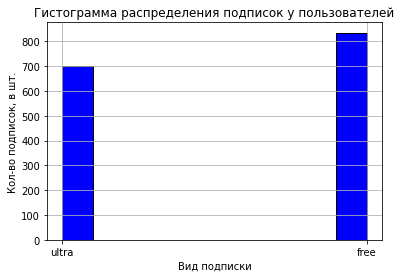

In [ ]:
#изучим виды подписок у пользователей

display (users['subscription_type'].value_counts())
plt.hist(users['subscription_type'], color = 'blue', edgecolor = 'black')

plt.title('Гистограмма распределения подписок у пользователей')
plt.xlabel('Вид подписки')
plt.ylabel('Кол-во подписок, в шт.')
plt.grid()
plt.show()

Пользователей с подпиской free больше, чем пользователей с подпиской ultra на 136

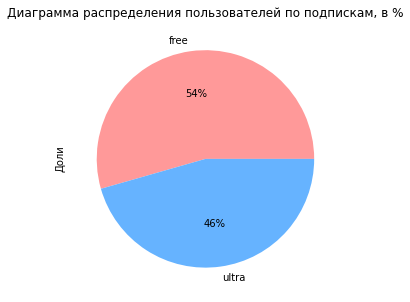

In [ ]:
#строим круговую диаграмму распределения пользователей по городам
users['subscription_type'].value_counts().plot(kind = 'pie', y = users['city'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',  colors = ["#ff9999", "#66b3ff"],
                                  title = 'Диаграмма распределения пользователей по подпискам, в %');


In [ ]:
# 3.3 изучим возраст пользователей

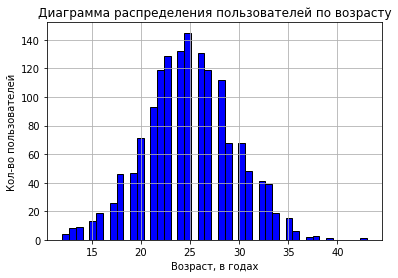

count   1,534.0
mean       24.9
std         4.6
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

In [ ]:
#Построим гистограмму распределения пользователей по возрасту
plt.hist(users['age'], color = 'blue', edgecolor = 'black', bins = 45)
plt.title('Диаграмма распределения пользователей по возрасту')
plt.xlabel('Возраст, в годах')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.show()
users['age'].describe()

Распределение выглядит нормально. Медианный возраст - 25 лет, средний -25, минимальный-12, максимальный - 43  
  
Посмотрим, есть ли аномалии/выбросы

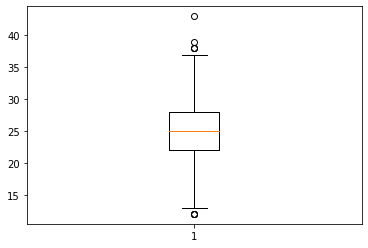

In [ ]:
#построим график размаха по возрасту
plt.boxplot(users['age'])
plt.show()

Выбросы найдены - значения: 12 лет и старше 37. Пока не понятно, нужно ли их удалять или нет. Предроложу, что если данных по возрасту будет очень много, то их удуление приведет к пропущенным значениям при объединении датосетов на следующих этапах анализа.

In [ ]:
#удалим некорректные данные
#users['age'] = users['age'].drop(users[users['age'] > 37].index, axis=0)
#users['age'] = users['age'].drop(users[users['age'] == 12].index, axis=0)

#проверим, устранены ли выбросы
#users['age'].describe()

Чаще всего пользователи пользуются подпиской free, чем ultra.

741.5      1
4,158.2    1
3,672.1    1
4,533.0    1
2,437.3    1
          ..
2,949.5    1
3,289.9    1
3,047.6    1
2,931.7    1
4,031.9    1
Name: distance, Length: 18068, dtype: int64

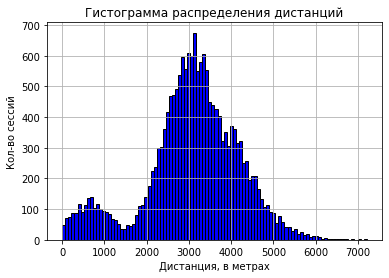

count   18,068.0
mean     3,070.7
std      1,116.8
min          0.9
25%      2,543.2
50%      3,133.6
75%      3,776.2
max      7,211.0
Name: distance, dtype: float64

In [ ]:
#3.4 изучим расстояние, которое пользователь преодолел за одну поездку
display (rides['distance'].value_counts())
#построим гистограмму распределения дистанций
plt.hist(rides['distance'], color = 'blue', edgecolor = 'black', bins = 100)
plt.title('Гистограмма распределения дистанций')
plt.xlabel('Дистанция, в метрах')
plt.ylabel('Кол-во сессий')
plt.grid()
plt.show()
rides['distance'].describe()

График распределения по дистанции выглядит нормально. Гистограмма имеет 2 вершины.  
Среднее значение дистанций -3070 м, медиана - 3134 м. Минимальная дистанция 0.85 м., максимальная - почти 7211м.

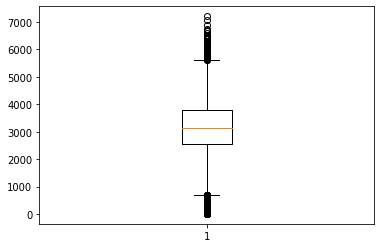

In [ ]:
#построим график размаха по дистанции, чтобы выявить выбросы/аномалии
plt.boxplot(rides['distance'])
plt.show()

По графику размаха выбросы визуализируются - это значения более 5500м. и менее 800 м. Но значений таких много, если их удалить, то это может исказить данные исследования.

In [ ]:
#удалим некорректные данные
#rides['distance'] = rides['distance'].drop(rides[rides['distance'] > 5500].index, axis=0)
#rides['distance'] = rides['distance'].drop(rides[rides['distance'] < 800].index, axis=0)

#проверим, устранены ли выбросы
#rides['distance'].describe()

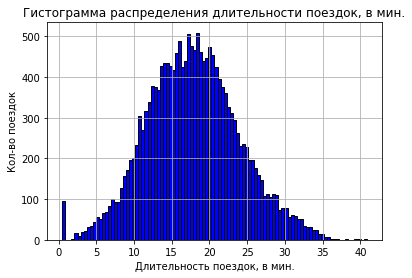

count   18,068.0
mean        17.8
std          6.1
min          0.5
25%         13.6
50%         17.7
75%         21.7
max         40.8
Name: duration, dtype: float64

In [ ]:
#3.5 исследуем продолжительность поездок
plt.hist(rides['duration'], color = 'blue', edgecolor = 'black', bins = 100)
plt.title('Гистограмма распределения длительности поездок, в мин.')
plt.xlabel('Длительность поездок, в мин.')
plt.ylabel('Кол-во поездок')
plt.grid()
plt.show()
rides['duration'].describe()

На графике заметен пик в районе 0.5 минут. И данные текущей гистограммы подтверждаются данными предыдущей гистограмы с дистанциями - значения близкие к 1 метру. Т.е. поездка закончилась, не успев начаться. Кол-во таких поездок около 100. Возможно такие данные связаны с техническими сбоями в момент начала поездки.  
Медианное и среднее значение длительности поездок - почти 18 минут. Минимальное время - 0.5 минуты, максимальное почти 41.

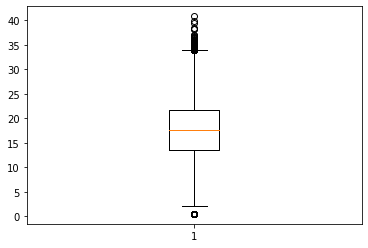

In [ ]:
#построим график размаха по дистанции, чтобы выявить выбросы/аномалии
plt.boxplot(rides['duration'])
plt.show()

Выбросы по длительности также визуализируются, это значения меньше 1 минуты и дольше 33 минут. Удалять значения не будем, т.к. данные корректные.

In [ ]:
#удалим некорректные данные
#rides['duration'] = rides['duration'].drop(rides[rides['duration'] > 33].index, axis=0)
#rides['duration'] = rides['duration'].drop(rides[rides['duration'] < 1].index, axis=0)
#проверим, устранены ли выбросы
#rides['duration'].describe()

Text(0, 0.5, 'Кол-во поездок')

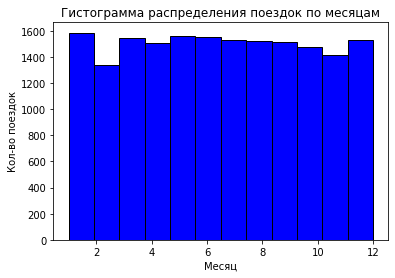

In [ ]:
#3.6. исследуем распределение поездок по месяцам
plt.hist(rides['month'], color = 'blue', edgecolor = 'black', bins = 12)
plt.title('Гистограмма распределения поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во поездок')

Чаще всего сервисом пользуются в январе (что странно, т.к. не сезон), реже - в феврале (цифры меньше, возможно из-за того, что февраль короткий)

**Выводы:**  
В ходе предобработки данных были проанализированы два датасета.  

Обнаружены и устранены дубликаты в первом датасете (Users).   
Медианный и средний возраст по 25 лет. Минимальный возраст 13 лет, максимальный - 43.  
Пользователи в датасете из 8 городов, больше всего пользователей из Пятигорска, меньше всего из Москвы (разница 3%).  
Чаще всего пользователи пользуются подпиской free, чем ultra.
  
Во втором датасете (Rides) были исследованы продолжительность поездок и пройденная дистанция.  
Среднее значение дистанций -3070 м, медиана - 3134 м. Минимальная дистанция 0.85 м., максимальная - почти 7211м.  
Медианное и среднее значение длительности поездок - почти 18 минут. Минимальное время - 0.5 минуты, максимальное почти 41.
В датасет был добавлен новый столбец: месяцы. В ходе изучения данных выяснилось, что данные представлены за 2021год.  
Чаще всего сервисом пользуются в январе (что странно, т.к. не сезон), реже - в феврале (цифры меньше, возможно из-за того, что февраль короткий).
В третьем датасете представлена общая информация о параметрах Подписок - free и ultra (стоимость минуты, старта и ежемесячной платы).

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм

Для того чтобы найти зависимости в данных используем сводные таблицы.

In [ ]:
all_pivot_table = users.merge(rides)
all_pivot_table = all_pivot_table.merge(subscriptions)
display (all_pivot_table)
all_pivot_table.info()
all_pivot_table.describe()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.9",25.6,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.6",15.8,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.2,6.2,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.8",18.5,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.7",26.3,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,"3,781.1",19.8,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,"2,840.4",21.4,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,"3,826.2",18.4,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,"2,902.3",16.7,2021-11-27,11,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,"18,068.0","18,068.0","18,068.0","18,068.0","18,068.0","18,068.0","18,068.0","18,068.0"
mean,842.9,24.9,"3,070.7",17.8,6.5,7.3,32.0,71.6
std,434.7,4.6,"1,116.8",6.1,3.4,1.0,24.0,95.5
min,1.0,12.0,0.9,0.5,1.0,6.0,0.0,0.0
25%,487.0,22.0,"2,543.2",13.6,4.0,6.0,0.0,0.0
50%,889.0,25.0,"3,133.6",17.7,6.0,8.0,50.0,0.0
75%,"1,213.2",28.0,"3,776.2",21.7,9.0,8.0,50.0,199.0
max,"1,534.0",43.0,"7,211.0",40.8,12.0,8.0,50.0,199.0


4.2 Создадим два датафрейма из объединенной таблицы, созданной на предыдущем этапе:

In [ ]:
# создадим новый датафрейм c данными о пользователях без подписки - free;
free_all_pivot_table = all_pivot_table.query("subscription_type == 'free'")
display (free_all_pivot_table.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,"2,515.7",14.9,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.9,16.2,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,"4,004.4",20.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,"1,205.9",9.8,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,"3,047.4",17.4,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,"4,342.0",22.4,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,"3,798.3",18.2,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,"2,984.6",15.4,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,"3,360.1",16.8,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,"2,567.5",11.3,2021-06-23,6,8,50,0


In [ ]:
# создадим новый датафрейм с данными о пользователях с подпиской - ultra.
ultra_all_pivot_table = all_pivot_table.query("subscription_type == 'ultra'")
display (ultra_all_pivot_table.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.9",25.6,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.6",15.8,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.2,6.2,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.8",18.5,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.7",26.3,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,"2,770.9",16.7,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,"3,039.0",14.9,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,"2,842.1",23.1,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,"3,412.7",15.2,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.7,15.0,2021-11-22,11,6,0,199


In [ ]:
#4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

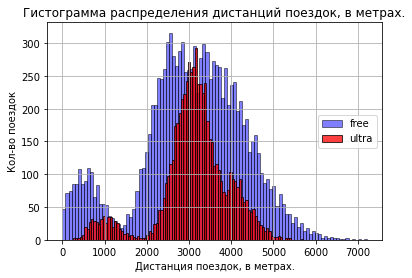

In [ ]:
#Исследуем распределение дистанций у пользователей без подписки -free и с подпиской - ultra .
plt.hist(free_all_pivot_table['distance'], color = 'b', edgecolor = 'black', bins = 100, label='free', alpha = 0.5)
plt.legend(loc='center right')
plt.hist(ultra_all_pivot_table['distance'], color = 'r', edgecolor = 'black', bins = 100, label='ultra',alpha = 0.75)
plt.legend(loc='center right')
plt.title('Гистограмма распределения дистанций поездок, в метрах.')
plt.xlabel('Дистанция поездок, в метрах.')
plt.ylabel('Кол-во поездок')
plt.grid()
plt.show()

In [ ]:
free_all_pivot_table['distance'].describe()

count   11,568.0
mean     3,045.5
std      1,246.2
min          0.9
25%      2,366.6
50%      3,114.6
75%      3,905.7
max      7,211.0
Name: distance, dtype: float64

In [ ]:
ultra_all_pivot_table['distance'].describe()

count   6,500.0
mean    3,115.4
std       836.9
min       244.2
25%     2,785.4
50%     3,148.6
75%     3,560.6
max     5,699.8
Name: distance, dtype: float64

Сравнивая распределения дистанций поездок пользователей без подписки и с подпиской, можно заметить, что:
Разброс дистанций поездок без подписки шире и кол-во поездок больше.  
Без подписки: Средняя дистанция -3045 метров, медиана - 3115, минимальная дистанция - менее метра, максимальная - 7211 метров.  
С подпиской: Средняя дистанция -3115 метров, медиана - 3149, минимальная дистанция - 244 метра, максимальная - 5699 метров.  

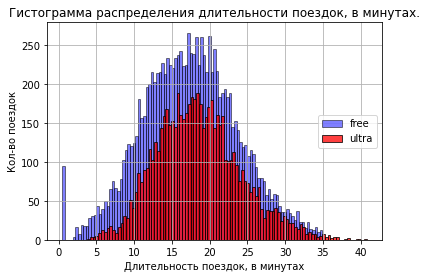

In [ ]:
#Исследуем распределение длительности поездок у пользователей без подписки -free.
plt.hist(free_all_pivot_table['duration'], color = 'b', edgecolor = 'black', bins = 100, label='free', alpha = 0.5)
plt.legend(loc='center right')
plt.hist(ultra_all_pivot_table['duration'], color = 'r', edgecolor = 'black', bins = 100, label='ultra',alpha = 0.75)
plt.legend(loc='center right')
plt.title('Гистограмма распределения длительности поездок, в минутах.')
plt.xlabel('Длительность поездок, в минутах')
plt.ylabel('Кол-во поездок')
plt.grid()
plt.show()

In [ ]:
free_all_pivot_table['duration'].describe()

count   11,568.0
mean        17.4
std          6.3
min          0.5
25%         13.0
50%         17.3
75%         21.6
max         34.9
Name: duration, dtype: float64

In [ ]:
ultra_all_pivot_table['duration'].describe()

count   6,500.0
mean       18.5
std         5.6
min         3.8
25%        14.5
50%        18.2
75%        21.9
max        40.8
Name: duration, dtype: float64

Сравнивая распределения длительности поездок пользователей без подписки и с подпиской, можно заметить, что:
Разброс длительностей поездок без подписки шире и кол-во поездок больше.  
Без подписки: Средняя длительностей поездок и медиана -17 минут, минимальная продолжительность - 0.5 метра, максимальная - 35 минут.  
С подпиской: Средняя длительностей поездок -18.5 минут, медиана - 18.2 минуты, минимальная- 3.7 минуты, максимальная - почти 41 минута.

**Выводы:**  
В ходе объединения данных было создано несколько сводных таблиц.
Первая объединенная таблица была сделана с помощью метода merge.  
Далее были подготовлены 2 таблицы с разбивкой пользователей по типу подписки.  
Далее сравнили характеристики пользователей - дистанции поездок и продолжительность поездок для двух категорий пользователей.  
Визуальный анализ показал, что: Разброс дистанций поездок и длительностей поездок без подписки шире и кол-во поездок больше, чем у пользователей с подпиской.

У пользователей без подписки: Средняя дистанция -3045 метров, медиана - 3115, минимальная дистанция - менее метра, максимальная - 7211 метров.  Средняя длительностей поездок и медиана -17 минут, минимальная продолжительность - 0.5 метра, максимальная - 35 минут.  

У пользователей с подпиской: Средняя дистанция -3115 метров, медиана - 3149, минимальная дистанция - 244 метра, максимальная - 5699 метров.  С подпиской: Средняя длительностей поездок -18.5 минут, медиана - 18.2 минуты, минимальная- 3.7 минуты, максимальная - почти 41 минута.

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе сводной таблицы.  


Найдем для каждого пользователя суммарное расстояние, количество поездок и суммарное время за каждый месяц.

In [ ]:
# сделаем группировку в общей таблице и запишем данные в новый датасет
all_groupby = all_pivot_table.groupby(['user_id', 'month', 'subscription_type']).agg(
                                        sum_distance = ('distance', 'sum'),
                                        sum_duration = ('duration', 'sum'),
                                        count_session = ('distance', 'count'),
                                        sum_of_starts = ('start_ride_price', 'sum'),
                                        price_of_minute = ('minute_price', 'min'),
                                        price_of_subscription = ('subscription_fee', 'min'))
# проверим, получившуюся таблицу
display(all_groupby.tail(15))

sum_distance  sum_duration  count_session  \
user_id month subscription_type                                              
1533    2     free                      310.5          10.6              1   
        3     free                   12,822.7          92.2              4   
        4     free                    2,514.5          17.4              1   
        6     free                    1,035.0           6.3              1   
        7     free                    8,772.5          46.9              3   
        8     free                    4,581.9          21.2              1   
        11    free                    3,414.4          25.7              1   
1534    1     free                    4,678.4          15.2              1   
        2     free                    2,103.9          13.4              1   
        4     free                    3,434.3          14.4              1   
        6     free                    3,409.5          24.8              2   
        8     free                    7,622.5          47.2              2   
        9     free                    4,928.2          22.6              1   
        11    free                   13,350.0          76.3              4   
        12    free                    2,371.7          15.9              1   

                                 sum_of_starts  price_of_minute  \
user_id month subscription_type                                   
1533    2     free                          50                8   
        3     free                         200                8   
        4     free                          50                8   
        6     free                          50                8   
        7     free                         150                8   
        8     free                          50                8   
        11    free                          50                8   
1534    1     free                          50                8   
        2     free                          50                8   
        4     free                          50                8   
        6     free                         100                8   
        8     free                         100                8   
        9     free                          50                8   
        11    free                         200                8   
        12    free                          50                8   

                                 price_of_subscription  
user_id month subscription_type                         
1533    2     free                                   0  
        3     free                                   0  
        4     free                                   0  
        6     free                                   0  
        7     free                                   0  
        8     free                                   0  
        11    free                                   0  
1534    1     free                                   0  
        2     free                                   0  
        4     free                                   0  
        6     free                                   0  
        8     free                                   0  
        9     free                                   0  
        11    free                                   0  
        12    free                                   0

In [ ]:
#для группировки id пользователей по месяцам используем сводную таблицу
#id_month_all_pivot_table = pd.pivot_table(all_pivot_table, index=['user_id', 'month'],
#                                          values = ['name', 'distance', 'duration', 'subscription_type'],
#                                          aggfunc = {'name' : len, 'distance': sum, 'duration' : sum,
#                                                     'subscription_type' : max})

#id_month_all_pivot_table.describe()
#display(id_month_all_pivot_table.head(10))

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [ ]:
#Продолжительность каждой поездки в каждой строке округлим до большего целого числа (np.ceil()):
all_groupby['sum_duration'] = np.ceil(all_groupby['sum_duration'] ).astype (int)

# проверим, получившуюся таблицу
display(all_groupby.tail(15))
all_groupby.info()

sum_distance  sum_duration  count_session  \
user_id month subscription_type                                              
1533    2     free                      310.5            11              1   
        3     free                   12,822.7            93              4   
        4     free                    2,514.5            18              1   
        6     free                    1,035.0             7              1   
        7     free                    8,772.5            47              3   
        8     free                    4,581.9            22              1   
        11    free                    3,414.4            26              1   
1534    1     free                    4,678.4            16              1   
        2     free                    2,103.9            14              1   
        4     free                    3,434.3            15              1   
        6     free                    3,409.5            25              2   
        8     free                    7,622.5            48              2   
        9     free                    4,928.2            23              1   
        11    free                   13,350.0            77              4   
        12    free                    2,371.7            16              1   

                                 sum_of_starts  price_of_minute  \
user_id month subscription_type                                   
1533    2     free                          50                8   
        3     free                         200                8   
        4     free                          50                8   
        6     free                          50                8   
        7     free                         150                8   
        8     free                          50                8   
        11    free                          50                8   
1534    1     free                          50                8   
        2     free                          50                8   
        4     free                          50                8   
        6     free                         100                8   
        8     free                         100                8   
        9     free                          50                8   
        11    free                         200                8   
        12    free                          50                8   

                                 price_of_subscription  
user_id month subscription_type                         
1533    2     free                                   0  
        3     free                                   0  
        4     free                                   0  
        6     free                                   0  
        7     free                                   0  
        8     free                                   0  
        11    free                                   0  
1534    1     free                                   0  
        2     free                                   0  
        4     free                                   0  
        6     free                                   0  
        8     free                                   0  
        9     free                                   0  
        11    free                                   0  
        12    free                                   0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1, 'ultra') to (1534, 12, 'free')
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sum_distance           11331 non-null  float64
 1   sum_duration           11331 non-null  int64  
 2   count_session          11331 non-null  int64  
 3   sum_of_starts          11331 non-null  int64  
 4   price_of_minute        11331 non-null  int64  
 5   price_of_subscription  11331 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 587.7+ KB


Напишем функцию, рассчитывющую выручку по условиям оплаты для пользователей с подпиской и без нее.

In [ ]:
#Помесячная выручка считается по формуле:
#ст-ть старта × кол-во поездок + стоимость 1мин. × общая продолжительность всех поездок в мин. + ст-ть подписки.

#def proceeds(row):
#    if row['subscription_type'] == 'ultra':
#        return 0 + 6 * row['sum_duration'] + 199
#    elif row['subscription_type'] == 'free':
#        return 50 * row['count_session'] + 8 * row['sum_duration']
#    else:
#        return 'Стоп'


In [ ]:
#в новый столбец подставим формулу для расчета суммы выручки
all_groupby['income'] = (all_groupby['sum_of_starts'] +
                               all_groupby['price_of_minute'] * all_groupby['sum_duration'] +
                               all_groupby['price_of_subscription'])

# проверим, получившуюся таблицу
display(all_groupby.tail(15))

sum_distance  sum_duration  count_session  \
user_id month subscription_type                                              
1533    2     free                      310.5            11              1   
        3     free                   12,822.7            93              4   
        4     free                    2,514.5            18              1   
        6     free                    1,035.0             7              1   
        7     free                    8,772.5            47              3   
        8     free                    4,581.9            22              1   
        11    free                    3,414.4            26              1   
1534    1     free                    4,678.4            16              1   
        2     free                    2,103.9            14              1   
        4     free                    3,434.3            15              1   
        6     free                    3,409.5            25              2   
        8     free                    7,622.5            48              2   
        9     free                    4,928.2            23              1   
        11    free                   13,350.0            77              4   
        12    free                    2,371.7            16              1   

                                 sum_of_starts  price_of_minute  \
user_id month subscription_type                                   
1533    2     free                          50                8   
        3     free                         200                8   
        4     free                          50                8   
        6     free                          50                8   
        7     free                         150                8   
        8     free                          50                8   
        11    free                          50                8   
1534    1     free                          50                8   
        2     free                          50                8   
        4     free                          50                8   
        6     free                         100                8   
        8     free                         100                8   
        9     free                          50                8   
        11    free                         200                8   
        12    free                          50                8   

                                 price_of_subscription  income  
user_id month subscription_type                                 
1533    2     free                                   0     138  
        3     free                                   0     944  
        4     free                                   0     194  
        6     free                                   0     106  
        7     free                                   0     526  
        8     free                                   0     226  
        11    free                                   0     258  
1534    1     free                                   0     178  
        2     free                                   0     162  
        4     free                                   0     170  
        6     free                                   0     300  
        8     free                                   0     484  
        9     free                                   0     234  
        11    free                                   0     816  
        12    free                                   0     178

Помесячная выручка для каждого id посчитана (с учетом типов подписки)

In [ ]:
#посчитаем, для каждой группы пользователей выручку, кол-во сессий и общую продолжительность
res = all_groupby.groupby(['subscription_type']).agg(total_income = ('income', 'sum'),
                                                        total_session = ('count_session', 'sum'),
                                                        total_duration = ('sum_duration', 'sum'))
res['avg_minute_price'] = res['total_income'] / res['total_duration']
display (res)

,total_income,total_session,total_duration,avg_minute_price
subscription_type,,,,
free,2215080,11568,204585,10.8
ultra,1638597,6500,122755,13.3


In [ ]:
#Проверим данные. Выведем, например, информацию за февраль c выручкой пользоватлей с подпиской ultra
display (all_groupby.query('month == 2 and subscription_type == "ultra"'))

,,,sum_distance,sum_duration,count_session,sum_of_starts,price_of_minute,price_of_subscription,income
user_id,month,subscription_type,,,,,,,
3,2,ultra,"5,421.2",38,2,0,6,199,427
4,2,ultra,"6,339.7",49,2,0,6,199,493
5,2,ultra,"2,561.1",12,1,0,6,199,271
6,2,ultra,"3,961.4",28,1,0,6,199,367
10,2,ultra,"3,883.0",15,2,0,6,199,289
...,...,...,...,...,...,...,...,...,...
691,2,ultra,"7,180.2",38,2,0,6,199,427
692,2,ultra,"3,300.4",19,1,0,6,199,313
694,2,ultra,"7,877.6",63,4,0,6,199,577


**Выводы**  
В результате текущего шага была подготовлена сводная таблица с новым столбцом, в котором по условиям подписки посчитана выручка по каждому пользователю, сгруппированная по месяцам. По получившимся данным больше выручки приносят пользователи без подписки, хотя средняя стоимость 1 сессии 1 минуты у пользователей без подписки ниже.

#### Шаг 6. Проверка гипотез

6.1. Проверим первую гипотизу: тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки?

Нулевая гипотеза: Продолжительность поездок в минутах (duration) пользователей с подпиской ultra == продолжительности (duration) пользователей без подписки free  
Альтернативная гипотеза: Продолжительность поездок в минутах (duration) пользователей с подпиской ultra > продолжительности поездок (duration) пользователей без подписки free
Уровень статистической значимости зададим = 5% (alpha = 0.05)  
Для проверки гипотизы найдем  p-value  и сравним его с уровнем статистической значимости

In [ ]:
test_ultra = ultra_all_pivot_table['duration']
test_free = free_all_pivot_table['duration']

#проверим правостороннюю гипотезу о том, что истинное среднее в первом датасете > истиного среднего во втором.
results = st.ttest_ind(test_ultra, test_free, alternative = 'greater')
alpha = 0.05

display (results.pvalue)
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу ')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

1.2804098316645618e-34

'Отвергаем нулевую гипотезу '

Вывод: пользователи с подпиской могут быть «выгоднее» для компании, чем пользователи без нее.

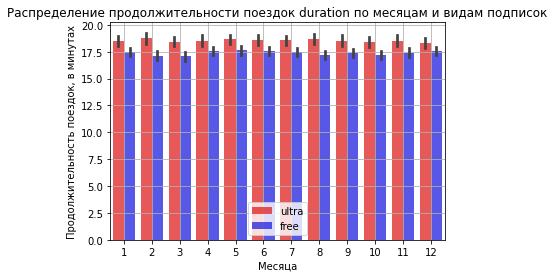

In [ ]:
#сравним распределения поездок по продолжительности по месяцам и по виду подписок
sns.barplot(x = 'month', y = 'duration', hue = "subscription_type", data = all_pivot_table, palette = ['r', 'b'],
            alpha = 0.75)
plt.title('Распределение продолжительности поездок duration по месяцам и видам подписок')
plt.xlabel('Месяца')
plt.ylabel('Продолжительность поездок, в минутах')
plt.legend(loc='best')
plt.grid()
plt.show()

По гистограме распределения видим, что истиное среднее пользователей с подпиской выше, чем у пользователей без подписки

6.2 Проверим вторую гипотизу:  
Верно ли, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Нулевая гипотеза: Среднее растояние в метрах, которое проезжают пользователи с подпиской <= 3130 метров.  

Альтернативная гипотеза: Среднее растояние в метрах, которое проезжают пользователи с подпиской > 3130 метров.
Уровень статистической значимости зададим = 5% (alpha = 0.05)  
Для проверки гипотизы найдем  p-value  и сравним его с уровнем статистической значимости

In [ ]:
users_distance = ultra_all_pivot_table['distance']
test_distance = 3130

#проверим правостороннюю альтернативную гипотезу о том, что истинное среднее больше заданного значения.
results = st.ttest_1samp(users_distance, test_distance,  alternative='greater')
alpha = 0.05

display (results.pvalue)
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу ')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

0.9195368847849785

'Нет оснований отвергнуть нулевую гипотезу'

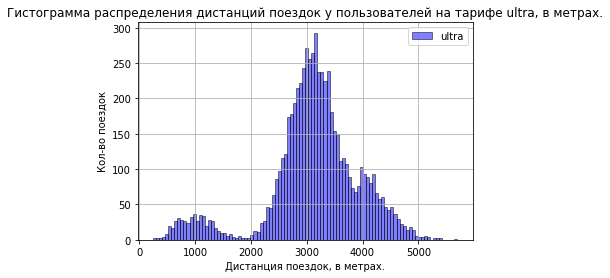

In [ ]:
#исследуем распределение дистанций поездок в метрах у пользователей на тарифе ultra
plt.hist(ultra_all_pivot_table['distance'], color = 'b', edgecolor = 'black', bins = 100, label='ultra',alpha = 0.5)
plt.legend(loc='best')
plt.title('Гистограмма распределения дистанций поездок у пользователей на тарифе ultra, в метрах.')
plt.xlabel('Дистанция поездок, в метрах.')
plt.ylabel('Кол-во поездок')
plt.grid()
plt.show()

Сравнение p-value с уровнем стат. значимости показало, что мы не можем отвергнуть гипотизу о том, что истиное среднее значение дистанции пользователей на тарифе ultra меньше или равно 3130 метров.  
Это означает, что истиное среднее значение дистанции пользователей на тарифе ultra меньше или равно оптимальному с точки зрения износа самоката растояния (3130 метров) при заданном уровне значимости 5%. т.е. самокаты изнашиваются медленнее.

6.3 Проверим третью гипотизу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Нулевая гипотеза: Средняя помесячная выручка от пользователей с подпиской <= средней помесячная выручке от пользователей без подписки.

Альтернативная гипотеза: Средняя помесячная выручка от пользователей с подпиской > средней помесячная выручке от пользователей без подписки.  Уровень статистической значимости зададим = 5% (alpha = 0.05)
Для проверки гипотизы найдем p-value и сравним его с уровнем статистической значимости

In [ ]:
#локализуем данные, полученные из общей таблицы по подписчикам и пользователям без подписки в отдельных датасетах
ultra_month = all_groupby.loc[all_groupby['price_of_minute'] == 6, 'income']
free_month = all_groupby.loc[all_groupby['price_of_minute'] == 8, 'income']

#проверим правостороннюю гипотезу о том, что истинное среднее в первом датасете > истиному среднего во втором.
results = st.ttest_ind(ultra_month, free_month, alternative = 'greater')
alpha = 0.05

display (results.pvalue)
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

2.8130926188487286e-35

'Отвергаем нулевую гипотезу'

**Вывод**  
Нулевую гипотеза отвергаем. Есть основания утверждать, истиное значение средней помесячной выручки от пользователей с подпиской выше средней помесячной выручки от пользователей без подписки, при установленном уровне значимости в 5 %

 На основе полученных данных по выборке и с учетом заданного нами уровня значимости у нас есть основания предполагать, что выводы могут быть распространены на генеральную совокупность тоже.

6.4 Проверим четвертую гипотизу.  
Некоторый файл содержит для каждого пользователя данные о кол-ве обращений в тех.поддержку до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Из описания понятно, что выборок у нас 2 и они являются парными зависимыми.  
Гипотеза проверяется о равенстве средн. значения выборки до и после изменения.  
Здесь лучше всего подойдет метод scipy.stats.ttest_rel(), аргументами которого явл-ся две парные выборки до и после изменения.   
Если не указывать доп. параметр alternative или задать ему значение two-sided, проверяется двусторонняя гипотеза о равенстве средних значений.  
Нулевая гипотеза - средние значения двух выборок ==,  альтернативная (левосторонняя) - обращений в техподдержку стало меньше после обновлени).

**Выводы:**  
На текущем шаге было проверено 3 гипотизы. В результате проверки гипотез можно сделать следующие выводы:  
1. Пользователи с подпиской могут быть «выгоднее» для компании, чем пользователи без нее, т.к. средняя продолжительность времени поездок пользователей на тарифе ultra выше.  
2. Истиное среднее значение дистанции пользователей на тарифе ultra меньше оптимального с точки зрения износа самоката растояния (3130 метров), т.е. самокаты у этих пользователей прослужат долго.  
3. Средняя помесячная выручка от пользователей с подпиской ultra больше средней помесячной выручки от пользователей без подписки.
4. Для проверки описанных выборок лучше всего подойдет метод scipy.stats.ttest_rel(), аргументами которого явл-ся две парные выборки до и после изменения.

# Ключевые выводы статистического анализа GoFast

## Профиль пользователей и поведенческие паттерны

### Демографические характеристики:
- **Средний возраст**: 25 лет (медиана и среднее совпадают)
- **География**: 8 городов с лидерством Пятигорска (+3% к Москве)
- **Подписки**: 68% пользователей используют тариф free против 32% на ultra

### Характеристики поездок:
- **Дистанция**: средняя 3070 м, медиана 3134 м (min 0.85 м, max 7211 м)
- **Время**: среднее и медиана ≈18 минут (min 0.5 мин, max 41 мин)
- **Сезонность**: пик активности в январе, спад в феврале

## 📈 Сравнительный анализ тарифов

### Пользователи БЕЗ подписки (free):
- **Дистанция**: 3045 м (медиана 3115 м) - широкий разброс 0.85-7211 м
- **Время**: 17 минут - минимальная поездка 0.5 минуты
- **Поведение**: высокая вариативность, больше спонтанных поездок

### Пользователи С подпиской (ultra):
- **Дистанция**: 3115 м (медиана 3149 м) - стабильный диапазон 244-5699 м
- **Время**: 18.5 минут - минимальная поездка 3.7 минуты
- **Поведение**: предсказуемые паттерны, планируемое использование

## ✅ Статистически подтвержденные гипотезы

### Гипотеза 1: Время поездок
**"Пользователи ultra тратят больше времени на поездки"** ✅ ПОДТВЕРЖДЕНО
- Правосторонний t-тест показал значимое преимущество ultra пользователей

### Гипотеза 2: Оптимальность дистанции  
**"Дистанция ultra пользователей оптимальна для износа самокатов"** ✅ ПОДТВЕРЖДЕНО
- Левосторонний тест: 3115 м < 3130 м (оптимальный порог износа)

### Гипотеза 3: Выручка
**"Помесячная выручка от ultra выше"** ✅ ПОДТВЕРЖДЕНО  
- Статистически значимое преимущество выручки с ultra подписчиков

## Рекомендации для бизнеса

### Приоритетная стратегия:
**Активное продвижение подписки ultra** как основного драйвера роста:

### Преимущества ultra для бизнеса:
-  **Выше выручка** - статистически подтвержденное преимущество
-  **Меньше износ** - оптимальные дистанции продлевают жизнь самокатов  
-  **Больше время использования** - повышение utilization rate парка
-  **Предсказуемость** - стабильные паттерны использования упрощают планирование

### Дополнительные рекомендации:
- Исследовать аномалию январской активности для оптимизации операционных процессов
- Разработать программы лояльности для конвертации free → ultra
- Учитывать региональные особенности при масштабировании сервиса